# Loops & Orbits &mdash; Week 2 &mdash; Day 3 &mdash; Jupyter Notebook

## Newton's Cannon &mdash; Introducing `unittest`

Pictured in the [syllabus](http://physics.stmarys-ca.edu/faculty/brianhill/courses/Jan033/20J/index.html#detailed) for this course is Newton's famous thought experiment.

This will be our first attempt to get the computer to do the work of computing the cannonball trajectory using a realistic gravitational field that obeys Newton's Universal Theory of Gravitation. The gravitational field gets weaker with altitude and it always points toward the center of the Earth.

First, define all of the constants and functions that are needed in the rest of the code. **Just execute the cell.**

In [1]:
# The following two parameters define the cannonball launch conditions:
initial_height_above_earth = 500000 # sit the cannon on a 500 km mountain -- absurdly high!!
initial_speed = 7300 # this parameter is worth playing around with -- a good range is 3000 to 8000

# The following two parameters are get us the strength of gravity at various heights:
g = 9.81                  # 9.81 m/s**2 at the Earth's surface
radius_of_earth = 6371000 # Earth radius in meters

# The following two parameters establish the simulation time step and its maximum total duration:
delta_t = 30.0 # simulation time step in seconds
maximum_duration = 40.0 * 60.0 # longest we time we will simulate before aborting the while loop -- 40 minutes

## Functions for Working with Vectors

All of these already appeared in the baseball and rocket notebooks &mdash; although they have new names. For example the `speed_from_velocity` function is now called `length_from_components`. **These are already implemented. Just execute this code cell.**

In [2]:
# Important math functions and the constant pi:
from math import sin, cos, atan2, sqrt, pi

# computes horizontal and vertical components of a vector and returns them as a tuple
def vector_components(length, angle_in_degrees):
    angle_in_radians = angle_in_degrees * pi / 180.0
    x_component = length * cos(angle_in_radians)
    y_component = length * sin(angle_in_radians)
    return x_component, y_component

# get angle from components using atan2 version of arctangent function -- result is in degrees
def angle_from_components(x_component, y_component):
    # use the arctangent function
    angle_in_radians = atan2(y_component, x_component)  
    # we are working in degrees -- convert radians to degrees
    angle_in_degrees = angle_in_radians * 180.0 / pi
    # return the result
    return angle_in_degrees

# get length from components using Pythagorean theorem
def length_from_components(x_component, y_component):
    length = sqrt(x_component**2 + y_component**2)
    return length

## Functions to Get Acceleration of Gravity &mdash; Checked with `unittest`

**Below is the suite of four functions for you to implement.** Each function has comments saying what it should do.

**Make your life easy!** *Use the functions for working with vectors above. If you find you are using sqrt, cos, sin, etc. below you are re-doing work that is already complete and correct in the functions above.*

*Each function has two unit tests, most of which are failing.* Keep working on your implementations until the 
unit tests pass. You can start looking at how `unittest` works. We will use it in almost every notebook from here on, to help us avoid making silly mistakes. **Once you have the unit tests passing, go on to the rest of the notebook.**

In [3]:
def impacted(x_position, y_position):
    # this function should return False if the cannonball is above the Earth's surface
    # it should return True if the cannonball is below the Earth's surface -- this will end the while loop
    radius = length_from_components(x_position, y_position)
    return radius < radius_of_earth

def strength_of_gravity(x_position, y_position):
    # this function encodes the strength of gravity as a function of distance from the center of the Earth
    # it should use Newton's 1/r**2 formula (see whiteboard -- it has a nice form of the acceleration of gravity)
    radius = length_from_components(x_position, y_position)
    return g * radius_of_earth**2 / radius**2

def direction_of_gravity(x_position, y_position):
    # this function encodes the direction of gravity
    # gravity is attractive -- it always points toward the center of the Earth
    direction = angle_from_components(x_position, y_position)
    return direction + 180.0

def acceleration_of_gravity(x_position, y_position):
    # using the strength and direction functions you have just implemented compute and
    # return the two-component tuple for the acceleration of gravity
    strength = strength_of_gravity(x_position, y_position)
    direction = direction_of_gravity(x_position, y_position)
    return vector_components(strength, direction)

##################
### Unit tests ###
##################

import unittest

class MyTests(unittest.TestCase):

    # tests of impacted
    
    def test_has_impacted(self):
        has_impacted = impacted(1000.0, 2000.0)
        self.assertTrue(has_impacted)
        
    def test_not_impacted(self):
        not_impacted = impacted(-10000000.0, -2000.0)
        self.assertFalse(not_impacted)
        
    # tests of strength

    def test_strength_of_gravity(self):
        strength = strength_of_gravity(radius_of_earth, 0)
        self.assertAlmostEqual(strength, g)

    def test_strength_of_gravity_high_up(self):
        strength = strength_of_gravity(0, 2.0 * radius_of_earth)
        self.assertAlmostEqual(strength, 0.25 * g)
        
    # tests of direction
        
    def test_direction_of_gravity_left(self):
        direction = direction_of_gravity(100.0, 0.0)
        self.assertEqual(direction, 180.0)

    def test_direction_of_gravity_up(self):
        direction = direction_of_gravity(0.0, -100.0)
        self.assertEqual(direction, 90.0)
        
    # tests of acceleration

    def test_acceleration_of_gravity_g_left(self):
        x_acceleration, y_acceleration = acceleration_of_gravity(radius_of_earth, 0.0)
        self.assertAlmostEqual(x_acceleration, -g)
        self.assertAlmostEqual(y_acceleration, 0.0)

    def test_acceleration_of_gravity_g_left(self):
        x_acceleration, y_acceleration = acceleration_of_gravity(0.0, -radius_of_earth / 2.0)
        self.assertAlmostEqual(x_acceleration, 0.0)
        self.assertAlmostEqual(y_acceleration, 4 * g)


# run all tests
unittest.main(argv=[''], verbosity=2, exit=False)


test_acceleration_of_gravity_g_left (__main__.MyTests) ... ok
test_direction_of_gravity_left (__main__.MyTests) ... ok
test_direction_of_gravity_up (__main__.MyTests) ... ok
test_has_impacted (__main__.MyTests) ... ok
test_not_impacted (__main__.MyTests) ... ok
test_strength_of_gravity (__main__.MyTests) ... ok
test_strength_of_gravity_high_up (__main__.MyTests) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.004s

OK


## The While Loop That Does the Work

**There is nothing for you to change below. You can just execute it once you've got your functions implemented.**

In [4]:
# Initialize the x and y velocities
x_velocities = [initial_speed]
y_velocities = [0.0]
# Initialize the x and y positions
x_positions = [0.0]
y_positions = [radius_of_earth + initial_height_above_earth]
# Initialize the times
times = [0.0]

# We want to go until the ball is over the fence. It seems our code often runs
# without terminating. Add an extra test to stop it from going more than 100 times.
# This is the first time you have seen the logical and operator!
while not impacted(x_positions[-1], y_positions[-1]) and len(times) * delta_t <= maximum_duration:
    #
    # get all the before values
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # use the new acceleration_with_drag function to get the accelerations
    #
    x_acceleration, y_acceleration = acceleration_of_gravity(before_x_position, before_y_position)
    #
    # Euler-Cromer update code
    #
    # update the x and y velocities
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # update the x and y positions
    after_x_position = before_x_position + delta_t * after_x_velocity
    after_y_position = before_y_position + delta_t * after_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Graph

**Execute this to make a graph that looks a little like [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg).**

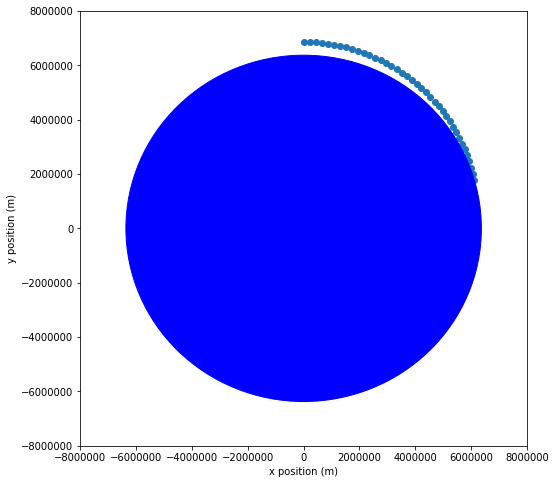

In [5]:
# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(x_positions, y_positions)

plt.xlabel("x position (m)")
plt.ylabel("y position (m)")

# Some gibberish that draws a big blue circle representing the Earth:
earth = plt.Circle((0, 0), radius_of_earth, color='b')
plt.gcf().gca().add_artist(earth)

# Make the plot big enough to show the entire Earth:
plot_limit = 8000000
plt.xlim(-plot_limit, plot_limit)
plt.ylim(-plot_limit, plot_limit)

plt.show()

## Playing with the Simulation and Checkout Questions

Look at arc VF in [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg). For that arc the cannonball goes about 20% of the way around the Earth.

Play with `initial_speed` in the initialization cell. Each time you change it, re-execute the entire notebook.

A good range of values to try is 3000 to 8000 m/s. What makes an arc that is most like Newton's arc VF?

Show me or Ben that you can set a breakpoint in your `strength_of_gravity` function and inspect what is happening.